# Task 3: Столбиковая диаграмма (barchart)#
У нас есть еще один вопрос, на который необходимо ответить: когда пользователи обычно выполняют лабораторные задания (делают коммиты): ночью, утром, днем или вечером? И как их поведение менялось с течением времени?

Выполните необходимые шаги по созданию следующего графика:

In [1]:
import sqlite3, pandas as pd, matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/School21/day12'

Mounted at /content/drive


##1. Анализируйте только пользователей, а не администраторов.

##2.Используйте фильтр status = 'ready' для коммитов.

In [3]:
conn = sqlite3.connect(f'{path}/data/checking-logs.sqlite')
req = '''SELECT timestamp as commit_time
        FROM checker
        WHERE status = 'ready'
        AND uid LIKE 'user__%'
      '''

In [4]:
df = pd.io.sql.read_sql(req, conn, parse_dates = ['commit_time'])

##3. Размеры шрифта и figsize такие же, как и раньше.

##4. Ночь — с 0:00:00 до 03:59:59, утро — с 04:00:00 до 09:59:59, день — с 10:00:00 до 16:59:59, вечер — с 17:00:00 до 23:59:59.

In [5]:
df['date'] = df.commit_time.dt.date
df['daytime'] = pd.cut(df.commit_time.dt.hour,
       bins=[0, 4, 10, 17, 24],
       labels=['ночь', 'утро', 'день', 'вечер'],
      right=False)


In [6]:
df['views'] = 1
dfg = df.drop(columns=["commit_time"]).groupby(by=['date', 'daytime'], dropna=False).count()

In [7]:
dfc = pd.pivot_table(dfg, values='views', columns='daytime', index='date')

In [8]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2020-04-17 to 2020-05-21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ночь    35 non-null     int64
 1   утро    35 non-null     int64
 2   день    35 non-null     int64
 3   вечер   35 non-null     int64
dtypes: int64(4)
memory usage: 1.4+ KB


In [9]:
dfc.shape

(35, 4)

##5. Выберите цветовую палитру по своему вкусу, не обязательно использовать те же самые цвета, что на графике выше.

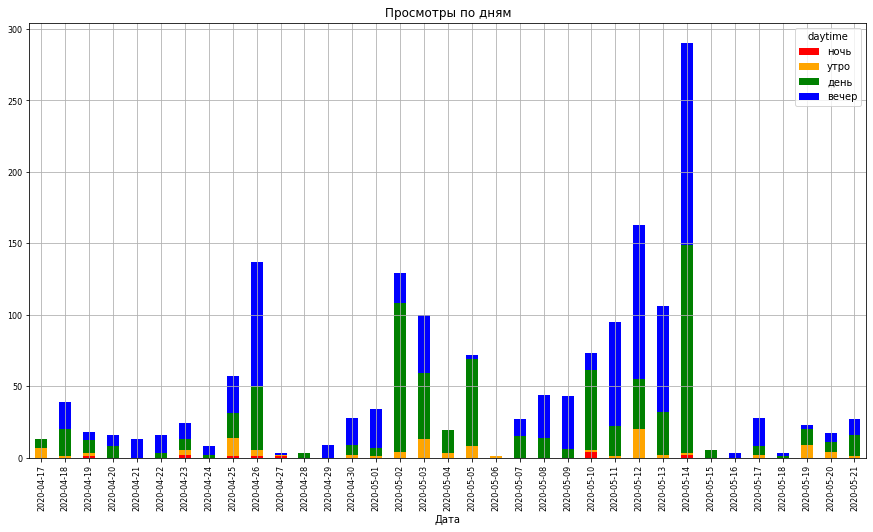

In [10]:
dfc.plot(
    kind = 'bar',
    stacked = True,
    fontsize = 8,
    figsize=(15,8),
    title="Просмотры по дням",
    xlabel="Дата",
    rot=90,
    grid=True,
    color=['red', 'orange', 'green', 'blue']
)
plt.show()

In [11]:
conn.close()

##6. В конце Jupyter Notebook создайте markdown-ячейки и вставьте в них следующие вопросы. 
*   «Когда пользователи обычно выполняют лабораторные задания: ночью, утром, днем или вечером?». Ответ — два наиболее распространенных периода времени.
*   «В какой день имеется наибольшее количество коммитов и одновременно с этим количество коммитов вечером выше, чем днем?» Ответ — дата этого дня.

Чаще всего лабораторные задания выполняются днём и вечером

Наибольшее количество коммитов и одновременно с этим количество коммитов вечером выше, чем днем 12.05.2020